In [ ]:
# Preparing where we were at the end of the last notebook
from htrc_features import FeatureReader
fr = FeatureReader(['data/sample-file1.basic.json.bz2', 'data/sample-file2.basic.json.bz2'])
vol = fr.first()
tokens = vol.tokens_per_page()
tl = vol.tokenlist()

# Working with DataFrames

The Pandas DataFrame type returned by the HTRC Feature Reader is very malleable. To work with the tokenlist that you retrieved earlier, three skills are particularily valuable:

1. Selecting subsets by a condition
2. Slicing by index
3. Grouping and aggregating

### Selecting Subsets of a DataFrame by a Condition

Consider this example need: *I only want to look at tokens that occur more than ten times on a page.* 
Remembering that the table-like output from the HTRC Feature Reader is a Pandas DataFrame, the way to pursue this goal is to learn to filter and subset DataFrames. Knowing how to do so is important for working with just the data that you need.

To subset individual rows of a DataFrame, you can provide a series of True/False values to the DataFrame, formatted in square brackets. Consider this fake example:

```python
to_keep = [True, False, False, ..., True]
fake_dataframe[to_keep]
```

After receiving these boolean values, the DataFrame goes through every row and returns only the ones that match up to "True" in the given order. So, *the task of subsetting a DataFrame is a matter of figuring out the True/False values for which rows you want to keep.*

Consider the example need in that context. To select just the tokens that occur more than 10 times on a page, we need to determine what rows match the criteria, i.e. *"this token has a count which is greater than 10"*. Let's try to convert that goal to code.

First, "this page has a count" means that we are concerned specifically in the 'count' column, which can be singled out from our `tl` table with _tl['count']_. "Greater than 10" is formalized as _> 10_ so try the following and see what you get:

```python
tl['count'] > 10
```

```
page  section  token          pos
1     body     0              CD     False
...
267   body     prince         NN     False
               quite          RB     False
               ran            VBD    False
```

It is a DataFrame of True/False values! Each value indicates whether the 'count' column in the row matches the criteria or not. We haven't selected a subset yet, we simply asked a question and were told for each row when the question was true or false.

> You may wonder why page, section, token, and pos are still seen, even though 'count' was selected. This is because, as noted earlier, these are part of the DataFrame *index*, so they're part of the information about that row. You can convert the index to data columns with `reset_index()`. In this workshop we will keep the index intact, though there are circumstances with there are benefits to resetting it.

Armed with the True/False values of whether each value of 'count' is or isn't greater than 10, we can give those values to `tl` in square brackets.

In [ ]:
matches = tl['count'] > 10
tl[matches]

count
page section token pos       
11   body    0     CD      35
             ©     NNP     13
15   body    .     .       31
20   body    ,     ,       19
             the   DT      12
22   body    ,     ,       23
23   body    ,     ,       16
24   body    ,     ,       22
             I     PRP     11
25   body    ,     ,       12
26   body    ,     ,       20
27   body    ,     ,       15
28   body    ,     ,       17
29   body    .     .       13
30   body    the   DT      11
31   body    ,     ,       13
             a     DT      11
32   body    ,     ,       15
33   body    ,     ,       15
34   body    ,     ,       16
35   body    ,     ,       11
36   body    ,     ,       13
38   body    ,     ,       18
             I     PRP     11
39   body    ,     ,       11
40   body    the   DT      12
41   body    ,     ,       14
42   body    ,     ,       12
43   body    ,     ,       16
44   body    ,     ,       18
...                       ...
240  body    ,     ,       14
241  body    ,     ,       12
242  body    I     PRP     11
243  body    "     ''      11
             ,     ,       21
244  body    ,     ,       20
245  body    ,     ,       14
246  body    the   DT      12
247  body    ,     ,       11
             the   DT      12
248  body    ,     ,       13
             the   DT      13
249  body    ,     ,       16
             the   DT      11
250  body    ,     ,       11
             the   DT      11
253  body    ,     ,       11
254  body    ,     ,       20
255  body    !     .       12
             ,     ,       16
256  body    ,     ,       16
257  body    ,     ,       12
258  body    ,     ,       16
259  body    ,     ,       17
260  body    ,     ,       16
261  body    ,     ,       14
262  body    ,     ,       18
263  body    ,     ,       20
264  body    ,     ,       16
266  body    ,     ,       14

[258 rows x 1 columns]

You can move the comparison straight into the square brackets, the more conventional equivalent of the above:

In [ ]:
tl[tl['count'] > 10]

count
page section token pos       
11   body    0     CD      35
             ©     NNP     13
15   body    .     .       31
20   body    ,     ,       19
             the   DT      12
22   body    ,     ,       23
23   body    ,     ,       16
24   body    ,     ,       22
             I     PRP     11
25   body    ,     ,       12
26   body    ,     ,       20
27   body    ,     ,       15
28   body    ,     ,       17
29   body    .     .       13
30   body    the   DT      11
31   body    ,     ,       13
             a     DT      11
32   body    ,     ,       15
33   body    ,     ,       15
34   body    ,     ,       16
35   body    ,     ,       11
36   body    ,     ,       13
38   body    ,     ,       18
             I     PRP     11
39   body    ,     ,       11
40   body    the   DT      12
41   body    ,     ,       14
42   body    ,     ,       12
43   body    ,     ,       16
44   body    ,     ,       18
...                       ...
240  body    ,     ,       14
241  body    ,     ,       12
242  body    I     PRP     11
243  body    "     ''      11
             ,     ,       21
244  body    ,     ,       20
245  body    ,     ,       14
246  body    the   DT      12
247  body    ,     ,       11
             the   DT      12
248  body    ,     ,       13
             the   DT      13
249  body    ,     ,       16
             the   DT      11
250  body    ,     ,       11
             the   DT      11
253  body    ,     ,       11
254  body    ,     ,       20
255  body    !     .       12
             ,     ,       16
256  body    ,     ,       16
257  body    ,     ,       12
258  body    ,     ,       16
259  body    ,     ,       17
260  body    ,     ,       16
261  body    ,     ,       14
262  body    ,     ,       18
263  body    ,     ,       20
264  body    ,     ,       16
266  body    ,     ,       14

[258 rows x 1 columns]

As might be expected, the tokens that occur very often on a single page are "the", "a", and various punctuation. The 'pos' column shows what part-of-speech the word is used in accordding to the [Penn Treebank tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html): `DT` is a determiner, `PRP` is a personal pronoun, etc. 

Multiple conditions can be chained with `&` (and) or `|` (or), using regular brackets so that Python known the order of operations. For example, words with a count greater than 3 *and* a count less than 7 are selected in this way:

In [ ]:
tl[(tl['count'] > 3) & (tl['count'] < 7)].head()

count
page section token pos       
9    body    .     .        4
11   body    ©     IN       6
                   NNS      4
12   body    ,     ,        6
17   body    "     ''       5

In [ ]:
tl.index.names

FrozenList(['page', 'section', 'token', 'pos'])

### Slicing DataFrames

Above, subsets of the DataFrame were selected based on a matching criteria for columns. It is also possible to select a DataFrame subset by specifying the values of its index, a process called **slicing**. For example, you can ask, *"give me all the verbs for pages 9-12"*.

In the DataFrame returned by `vol.tokenlist()`, page, section, token, and POS are part of the index (try the command `tl.index.names` to confirm). One can think of an index as the margin content of an Excel spreadsheet: the numbers along the top and letters along the right side are the indices. A cell can be referred to as A1, A2, B1... In pandas, however, you can name these, so instead of A, B, C, rows can be referred to by more descriptive names. You can also how multiple levels, so you're not bound by the two-dimensions of a table format. With a multiindexed DataFrame, you can ask for `Page=24,section=Body, ...`.

<img src="images/Excel.PNG" width="300px" />
*One can think of an index as the margin notations in Excel (i.e. 1,2,3... and A,B,C,..), except it can be named and can have multiple levels.*
    
Slicing a DataFrame against a labelled index is done using `DataFrame.loc[]`. Try the following examples and see what is returned:

```python
# Select information from page 17: 
tl.loc[(17),]
# Select 'body' section of page 17:
tl.loc[(17, 'body'),]
# Select counts of the word 'Anne' in the 'body' section of page 17: 
tl.loc[(17, 'body', 'Anne'),]
```

The columns are specified by label in a tuple, in order of index level: i.e. (1st_level_label, 2nd_level_label, 3rd_level_label). To skip specifying a label for a level -- that is, to select everything for that level -- `slice(None)` can be used as a placeholder:

- Select counts of the word 'Anne' for all pages and all page sections
  - `tl.loc[(slice(None), slice(None), "Anne"),]`
  
Finally, it is possible to select multiple labels per level of the multiindex, with a list of labels (i.e. _['label1', 'label2']_) or a sequence defines by a slice (i.e. `slice(start, end)`):

- Select pages 37, 38, and 52
  - `tl.loc[([37, 38, 52]),]`
- Select all pages from 37 to 40
  - `tl.loc[(slice(37, 40)),]`
  
> The reason for the comma in `tl.loc[(...),]` is because columns can be selected in the same way after the comma. Pandas DataFrames can have a multiple-level index for columns, but the HTRC Feature Reader does not use this.

Knowing how to slice, let's try to find the word "CHAPTER" in this work and compare to the earlier counts of tokens per page. 

The token list we previously set to `tl` only included body text, to include headers and footers in our search for `CHAPTER` we'll grab a new tokenlist with _section='all'_ specified.

In [ ]:
tl2 = vol.tokenlist(section='all')
chapter_pages = tl2.loc[(slice(None), slice(None), "CHAPTER"),]
chapter_pages

count
page section token   pos       
19   header  CHAPTER NNP      1
35   header  CHAPTER NNP      1
56   header  CHAPTER NNP      1
73   header  CHAPTER NNP      1
91   header  CHAPTER NNP      1
115  header  CHAPTER NNP      1
141  header  CHAPTER NNP      1
158  header  CHAPTER NNP      1
174  header  CHAPTER NNP      1
193  header  CHAPTER NNP      1
217  body    CHAPTER NNP      1
231  header  CHAPTER NNP      1
246  header  CHAPTER NNP      1

Earlier, token counts were visualized using `tokens.plot()`, a built-in function of DataFrames that uses the Matplotlib visualization library. 

We can add to the earlier visualization by using Matplotlib directly. Without dwelling too much on the specifics, try the following code which simply goes through every page number in the earlier search for 'CHAPTER' and adds a red vertical line at the place in the chart with `matplotlib.pyplot.axvline()`:

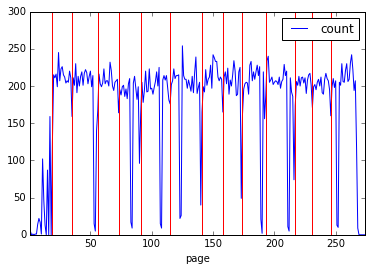

In [ ]:
# Get just the page numbers from the search for "CHAPTER"
page_numbers = chapter_pages.index.get_level_values('page')

# Visualize the tokens-per-page from before
tokens.plot()

# Add vertical lines for pages with "CHAPTER"
import matplotlib.pyplot as plt
for page_number in page_numbers:
    plt.axvline(x=page_number, color='red')

### Grouping DataFrames

Up to this point, the token count DataFrames have been subsetted, but not modified from the way they were returned by the HTRC Feature Reader. There are many cases where one may want to perform aggregation or transformation based on subsets of data. To do this, Pandas supports the 'split-apply-combine' pattern (Wickham 2011).

Split-apply-combine refers to the process of dividing a dataset into groups (*split*), performing some activity for each of those groups (*apply*), and joining the new groups back together into a single DataFrame (*combine*).

![The Split-Apply-Combine pattern](images/split-apply-combine.png)

![Example of Split-Apply-Combine, averaging movie grosses by director](images/example-split-apply-combine.png)

Split-apply-combine processes are supported on DataFrames with `groupby()`, which tells Pandas to split by some criteria. From there, it is possible to apply some change to each group individually, after which Pandas combines the affected groups into a single DataFrame again.

Try the following, can you tell what happens?

```
tl.groupby(level=["pos"]).sum()
```

The output is a count of how much each part-of-speech tag ("pos") occurs in the entire book.

- *Split* with `groupby()`: We took the token count dataframe that is set to `tl` and grouped by the part-of-speech (`pos`) level of the index. This means that rather than thinking into terms of rows, Pandas is now thinking of the `tl` DataFrame as a series of smaller groups, the groups selected by a common value for part of speech. So, all the personal pronouns ("PRP") are in one group, and all the adverbs ("RB") are in another, and so on.
- *Apply* with `sum()`: These groups were sent to an apply function, `sum()`. Sum is an aggregation function, so it sums all the information in the 'count' column for each group. For example, all the rows of data in the adverb group are summed up into a single count of all adverbs. 
- *Combine*: The combine step is implicit: the DataFrame knows from the `groupby` pattern to take everything that the apply function gives back (in the case of 'sum', just one row for every group) and stick it together.

`sum()` is one of many convenient functions [built-in](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to Panadas. Other useful functions are `mean()`, `count()`, `max()`. It is also possible to send your groups to any function that you write with `apply()`.

> groupby can be used on data columns or an index. To run against an index, as above, use `levels=[index_level_name]` as above. To group against columns, use `by=[column_name]`.

Below are some examples of grouping token counts.

- Find most common tokens in the entire volume (sorting by most to least occurrances)
  - `tl.groupby(level="token").sum().sort_values("count", ascending=False)`
- Count how many pages each token/pos combination occurs on
  - `tl.groupby(level=["token", "pos"]).count()`
  
Remember from earlier that certain information can be called by sending arguments to `vol.tokenlist()`, so you don't always have to do the grouping yourself.

Transformations can also be done, where the process returns the same number of rows as the input groups, but changes based on some grouping. Here is an example of more advanced usage, a [TF\*IDF](https://porganized.com/2016/03/09/term-weighting-for-humanists/) function:

In [ ]:
import numpy as np # For the log function
tl.groupby(level=["token"]).transform(lambda x: x * np.log(1+vol.page_count / x.count()) ).head()

count
page section token    pos          
1    body    0        CD   4.927254
             07481131 CD   5.616771
             3        CD   4.927254
             3433     CD   5.616771
             JUN6     .    5.616771

Compare the function in `transform()` above with the equation:

$IDF_w = log(1 + \frac{N}{df_w})$

Document frequency, $df_w$, is just 'how many pages (docs) does the word occur on?' Can you modify the above to use corpus frequency, which is 'how many times does the word occur overall in the corpus (i.e. across all pages)?'